# Importation Libraries 

In [1]:
# Import the necessary libraries at the beginning of the file.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.tokenize import RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
import xgboost as xgb
from xgboost import XGBClassifier
import re
import numpy as np

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.linear_model import LogisticRegression
import plotly.express as px
import string
import spacy
from spacy import displacy


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asrar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Methods/Functions

In [2]:
def model(x_train, x_test, y_train, y_test):
    # Initialize XGBoost (XGB), Logistic Regression (LR), and Random Forest (RF) models.
    XGB = XGBClassifier()
    XGB.fit(x_train, y_train)
    XGB_predicted = XGB.predict(x_test)
    
    LR = LogisticRegression(max_iter=400)
    LR.fit(x_train, y_train)
    LR_predicted = LR.predict(x_test)
    
    RF = RandomForestClassifier()
    RF.fit(x_train, y_train)
    RF_predicted = RF.predict(x_test)
    
    
    # Create a DataFrame to store model evaluation metrics.
    data = pd.DataFrame([['XGB',
                           metrics.accuracy_score(XGB_predicted, y_test),
                           metrics.precision_score(XGB_predicted, y_test),
                           metrics.recall_score(XGB_predicted, y_test),
                           metrics.f1_score(XGB_predicted, y_test)]
                         ,['LR',
                           metrics.accuracy_score(LR_predicted, y_test),
                           metrics.precision_score(LR_predicted, y_test),
                           metrics.recall_score(LR_predicted, y_test),
                           metrics.f1_score(LR_predicted, y_test)]
                         ,['RF',
                           metrics.accuracy_score(RF_predicted, y_test),
                           metrics.precision_score(RF_predicted, y_test),
                           metrics.recall_score(RF_predicted, y_test),
                           metrics.f1_score(RF_predicted, y_test)
                          ]
                          ],

                columns= ['model','Accuracy Score','Precision','Recall','F1-score'])

    
    

    # Create figure and axes
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
  
    # Normalize confusion matrices
    cm_xgb = confusion_matrix(y_test, XGB_predicted)

    cm_lr = confusion_matrix(y_test, LR_predicted)  

    cm_rf = confusion_matrix(y_test, RF_predicted)
    

    # XGB confusion matrix
    axs[0].set(xlabel='Prediction', ylabel='Actual')
    axs[0].set_title('Confusion Matrix for XGB')

    # LR confusion matrix
    axs[1].set(xlabel='Prediction', ylabel='Actual')
    axs[1].set_title('Confusion Matrix for LR')

    # RF confusion matrix
    axs[2].set(xlabel='Prediction', ylabel='Actual')
    axs[2].set_title('Confusion Matrix for RF')
    
    # Plot normalized confusion matrices
    axs[0].matshow(cm_xgb)
    axs[1].matshow(cm_lr) 
    axs[2].matshow(cm_rf)

    # Annotate cells with values
    for i in range(2):
        for j in range(2):
            axs[0].text(j, i, format(cm_xgb[i, j], '.0f'), ha="center", va="center", color="w")
            axs[1].text(j, i, format(cm_lr[i, j], '.0f'), ha="center", va="center", color="w")
            axs[2].text(j, i, format(cm_rf[i, j], '.0f'), ha="center", va="center", color="w")
            
    # Return the DataFrame containing model evaluation metrics.
    return(data)

In [3]:
# Dictionary containing common abbreviations and their full forms.
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "n't" : "not",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

# Function to convert an abbreviation to its full form.
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Function to convert abbreviations within a text.
def convert_abbrev_in_text(text):
    # Tokenize the input text into words.
    tokens = word_tokenize(text)
    
    # Convert each token using the 'convert_abbrev' function.
    tokens = [convert_abbrev(word) for word in tokens]
    
    # Join the tokens back into a sentence.
    text = ' '.join(tokens)
    return text

In [4]:
def clean_text(text_data):
    # Load the English stopwords and create a lemmatizer.
    stop = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    
    # Convert abbreviations to full forms in the 'review' column.
    text_data['review'] = text_data['review'].apply(lambda x: convert_abbrev_in_text(x))
    
    # Convert text to lowercase.
    text_data['review'] = text_data['review'].str.lower() 
    
    # Remove HTML tags from the text.
    text_data['review'] = text_data['review'].apply(lambda x: re.sub(r'<.*?>','', x))
    
    # Remove digits from the text.
    text_data['review'] = text_data['review'].apply(lambda x:''.join([i for i in x if not i.isdigit()]))
    
    # Remove punctuation from the text.
    text_data['review'] = text_data['review'].str.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords from the text.
    text_data['review'] = text_data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    # Lemmatize words in the text.
    text_data['review'] = text_data['review'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in word_tokenize(x)]))
    
    # Return the cleaned text data.
    return(text_data)

In [5]:
def data_process(vec,sentiment):
    
    # Split the data into training and testing sets.
    # 'vec' represents the feature vectors and 'sentiment' represents the target sentiment labels.
    x_train, x_test, y_train, y_test = train_test_split(vec,sentiment, test_size=0.2, random_state=52)
    
    
    # Map the 'negative' and 'positive' sentiment labels to numerical values.
    # This step is often necessary for machine learning models to work with categorical labels.
    y_train = y_train.map({'negative': 0, 'positive': 1})
    y_test = y_test.map({'negative': 0, 'positive': 1})
    
    # Return the processed training and testing data.
    return(x_train, x_test, y_train, y_test)

In [6]:
def wordtovector(reviews):
    
    # Split each review into a list of words.
    reviews = [review.split() for review in reviews]

    # Train a Word2Vec model on the reviews.
    model = Word2Vec(sentences=reviews, vector_size=100, window=5, min_count=1, workers=4)
    
    # Define a function to calculate the document vector.
    def document_vector(word2vec_model, doc):
        # Filter out words not present in the Word2Vec model's vocabulary.
        doc = [word for word in doc if word in word2vec_model.wv]
        
        # Calculate the mean vector of the words in the document.
        return np.mean(word2vec_model.wv[doc], axis=0)

    # Generate document vectors for each review using the trained Word2Vec model.
    reviews = [document_vector(model, review) for review in reviews]
    
    # Get the vocabulary and word counts from the Word2Vec model.
    vocab = model.wv.key_to_index
    word_counts = {word: model.wv.get_vecattr(word, 'count') for word in vocab}

    # Return the list of document vectors and word counts.
    return(reviews, word_counts)

In [7]:
def doc2vec(reviews):
    # Create TaggedDocument instances for each review.
    tagged_data = [TaggedDocument(words=review.split(), tags=[i]) for i, review in enumerate(reviews)]
  
    # Initialize a Doc2Vec model with specified parameters.
    model = Doc2Vec(vector_size=100, min_count=1, epochs=20)
  
    # Build the vocabulary of the Doc2Vec model.
    model.build_vocab(tagged_data)

    # Train the Doc2Vec model on the tagged data.
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
  
    # Generate document vectors for each review.
    docvecs = [model.dv[i] for i in range(len(reviews))]
    
    # Get the vocabulary and word counts from the Doc2Vec model.
    vocab = model.wv.key_to_index
    word_counts = {word: model.wv.get_vecattr(word, 'count') for word in vocab}
    
    # Return the list of document vectors and word counts.
    return(docvecs,word_counts)

# EDA and Data Preprocessing

In [8]:
# Read data from a CSV file'IMDB Dataset.csv'
imdb_data=pd.read_csv('IMDB Dataset.csv')

In [9]:
imdb_data

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [10]:
imdb_data.review.isnull().sum()

0

In [11]:
imdb_data.sentiment.isnull().sum()

0

In [12]:
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Text(0.5, 1.0, ' Dataset Sentiment count')

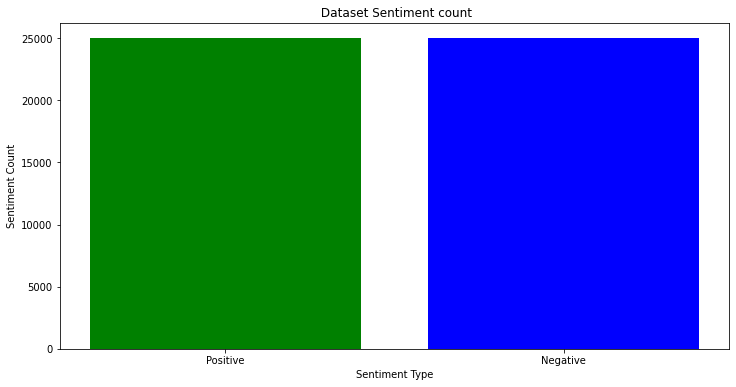

In [13]:
# Calculate the count of each sentiment type in the 'sentiment' column of the 'imdb_data' DataFrame.
counter = imdb_data['sentiment'].value_counts()

# Define index values for the bar chart.
index = [1,2]

# Create a new figure for the bar chart with specified size.
plt.figure(1,figsize=(12,6))

# Create a bar chart with sentiment counts, using different colors for positive and negative sentiment.
plt.bar(index,counter,color=['green','Blue'])

# Set custom x-axis tick labels.
plt.xticks(index,['Positive','Negative'],rotation=0)

# Set x-axis label.
plt.xlabel('Sentiment Type')

# Set y-axis label.
plt.ylabel('Sentiment Count')

# Set the title of the bar chart.
plt.title(' Dataset Sentiment count')

In [14]:
# Clean the text data in the 'imdb_data' DataFrame using the 'clean_text' function.
imdb_data = clean_text(imdb_data)

In [15]:
imdb_data.review[0]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience w

In [16]:
# Load the English language model from the spaCy library.
nlp = spacy.load("en_core_web_sm")

# Process the text of the review at index 12 using the loaded language model.
doc = nlp(imdb_data.review[12])

In [17]:
# Render the processed document 'doc' using the 'ent' (entity) visualization style in spaCy's displacy module.
displacy.render(doc, style="ent")

# Data Vectorization

In [18]:
# Generate document vectors and word counts using the 'doc2vec' function on the 'review' column 'imdb_data' DataFrame.
doc_vectors,doc_words = doc2vec(imdb_data['review'])

In [19]:
# Generate Word2Vec vectors and word counts using the 'wordtovector' function on the 'review' column 'imdb_data' DataFrame.
w2v,w2v_words = wordtovector(imdb_data['review'])

In [20]:
# Create a CountVectorizer instance.
cv = CountVectorizer()

# Fit and transform the 'review' column of the 'imdb_data' DataFrame using CountVectorizer.
con2Vec = cv.fit_transform(imdb_data['review'])

In [21]:
# Create a TfidfVectorizer instance.
tfidf = TfidfVectorizer()

# Fit and transform the 'review' column of the 'imdb_data' DataFrame using TfidfVectorizer.
tfidf2Vec = tfidf.fit_transform(imdb_data['review'])

In [22]:
# Get the list of feature names (words) from the fitted CountVectorizer and TfidfVectorizer instances.
count_words = cv.get_feature_names_out()
tfidf_words = tfidf.get_feature_names_out()

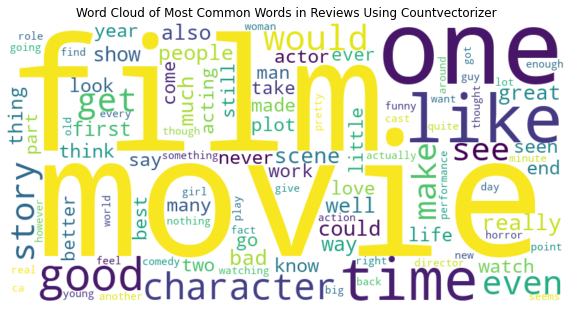

In [23]:
# Create a WordCloud for the most common words in the reviews using CountVectorizer
count_ngrams = pd.DataFrame(con2Vec.sum(axis=0), columns=count_words).T
count_ngrams.columns = ['count']
count_ngrams = count_ngrams.sort_values('count', ascending=False).head(100)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(count_ngrams.index, count_ngrams['count'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Reviews Using Countvectorizer')
plt.show()

In [24]:
# Get the top 20 most common n-grams in the reviews using CountVectorizer
count_ngrams = pd.DataFrame(con2Vec.sum(axis=0), columns=count_words).T
count_ngrams.columns = ['count']
count_ngrams = count_ngrams.sort_values('count', ascending=False).head(20)

# Plot bar chart of the top 20 most common n-grams
fig_count_ngrams = px.bar(count_ngrams, x=count_ngrams.index, y='count',
                         labels={'x': 'n-gram', 'y': 'count'},
                         title='Top 20 most common words for Count Vectorizer n-grams')
fig_count_ngrams.show()

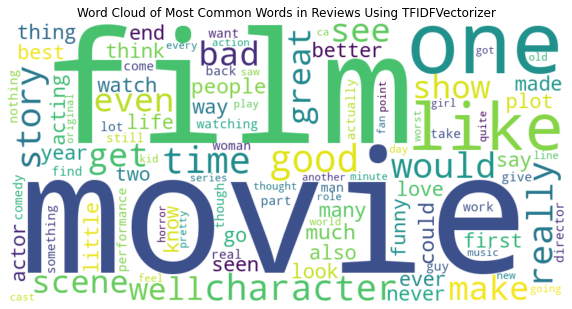

In [25]:
# Create a WordCloud for the most common words in the reviews using TFIDFVectorizer
count_ngrams = pd.DataFrame(tfidf2Vec.sum(axis=0), columns=tfidf_words).T
count_ngrams.columns = ['count']
count_ngrams = count_ngrams.sort_values('count', ascending=False).head(100)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(count_ngrams.index, count_ngrams['count'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.title('Word Cloud of Most Common Words in Reviews Using TFIDFVectorizer')
plt.show()

In [26]:
# Get the top 20 most common n-grams in the reviews using TF-IDF Vectorizer
count_ngrams = pd.DataFrame(tfidf2Vec.sum(axis=0), columns=tfidf_words).T
count_ngrams.columns = ['count']
count_ngrams = count_ngrams.sort_values('count', ascending=False).head(20)

# Plot bar chart of the top 20 most common n-grams
fig_count_ngrams = px.bar(count_ngrams, x=count_ngrams.index, y='count',
                         labels={'x': 'n-gram', 'y': 'count'},
                         title='Top 20 most common words for TFIDF Vectorizer n-grams')
fig_count_ngrams.show()

In [27]:
# Create a WordCloud for the most common words in the reviews using wordtoVec
wordcloud_count = WordCloud(width=800, height=500, background_color='white',stopwords=STOPWORDS, max_words=100).generate(' '.join(w2v_words))
fig_count = px.imshow(wordcloud_count)
fig_count.update_layout(title="Word Cloud of Most Common Words in Reviews Using WordtoVec")
fig_count.show()



In [28]:
# Get the top 20 most common n-grams in the reviews using Word2Vec
count_ngrams = pd.DataFrame(sorted(w2v_words.items(), key=lambda x: x[1])).tail(20)
count_ngrams = count_ngrams.iloc[::-1]

# Plot bar chart of the top 20 most common n-grams
fig_count_ngrams = px.bar(count_ngrams, x=0, y=1,
                         labels={'x': 'n-gram', 'y': 'count'},
                         title='Top 20 most common words for WordtoVec n-grams')
fig_count_ngrams.show()

In [29]:
# Create a WordCloud for the most common words in the reviews using Doc2Vec
wordcloud_count = WordCloud(width=800, height=500, background_color='white', stopwords=STOPWORDS, max_words=100).generate(' '.join(doc_words))
fig_count = px.imshow(wordcloud_count)
fig_count.update_layout(title="Word Cloud of Most Common Words in Reviews Using Doc2Vec")
fig_count.show()



In [30]:
# Get the top 20 most common n-grams in the reviews using Doc2Vec
count_ngrams = pd.DataFrame(sorted(doc_words.items(), key=lambda x: x[1])).tail(20)
count_ngrams = count_ngrams.iloc[::-1]

# Plot bar chart of the top 20 most common n-grams
fig_count_ngrams = px.bar(count_ngrams, x=0, y=1,
                         labels={'x': 'n-gram', 'y': 'count'},
                         title='Top 20 most common words for Doc2Vec n-grams')
fig_count_ngrams.show()

# Machine Learning 

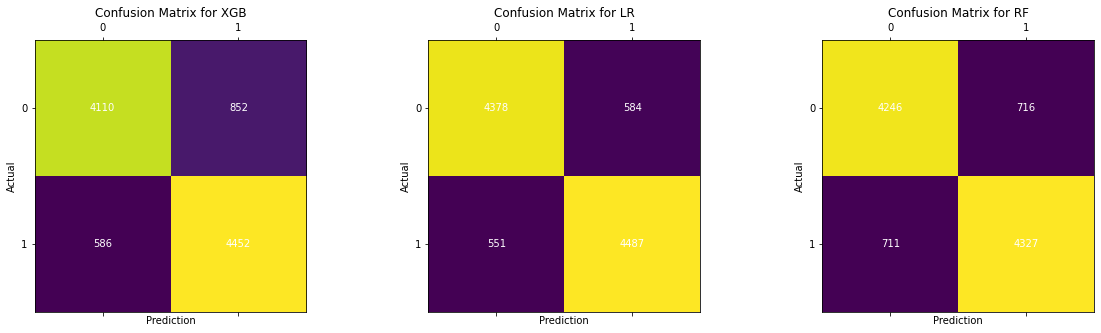

In [31]:
# Process the CountVectorizer data for modeling:
# Split the data into training and testing sets, perform label encoding, and create a DataFrame to store model results.

# Split the CountVectorizer matrix and sentiment labels into training and testing sets.
x_train, x_test, y_train, y_test = data_process(con2Vec,imdb_data.sentiment)
con2Vec_Data = model(x_train, x_test, y_train, y_test)

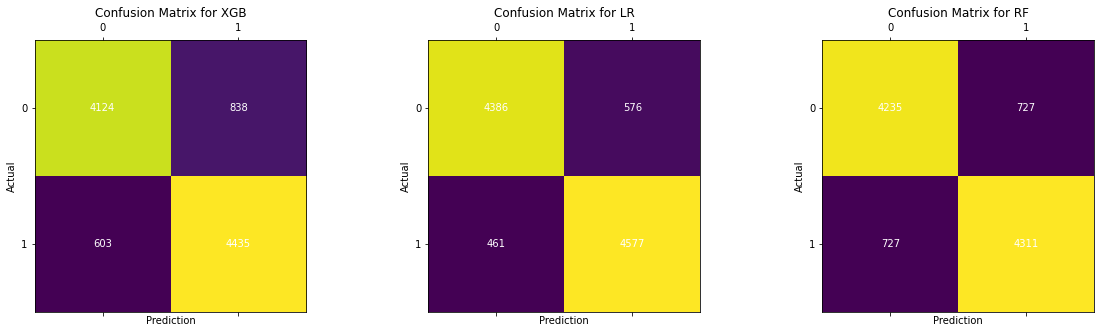

In [32]:
# Process the TF-IDF Vectorizer data for modeling:
# Split the data into training and testing sets, perform label encoding, and create a DataFrame to store model results.

# Split the TF-IDF Vectorizer matrix and sentiment labels into training and testing sets.
x_train, x_test, y_train, y_test = data_process(tfidf2Vec,imdb_data.sentiment)
tfidf2Vec_Data = model(x_train, x_test, y_train, y_test)

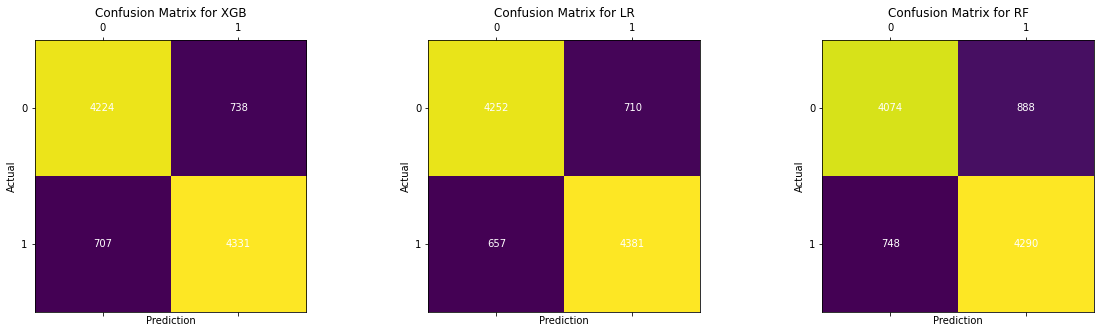

In [33]:
# Process the Word2Vec data for modeling:
# Split the data into training and testing sets, perform label encoding, and create a DataFrame to store model results.

# Split the Word2Vec matrix and sentiment labels into training and testing sets.
x_train, x_test, y_train, y_test = data_process(w2v,imdb_data.sentiment)
w2v_Data = model(x_train, x_test, y_train, y_test)

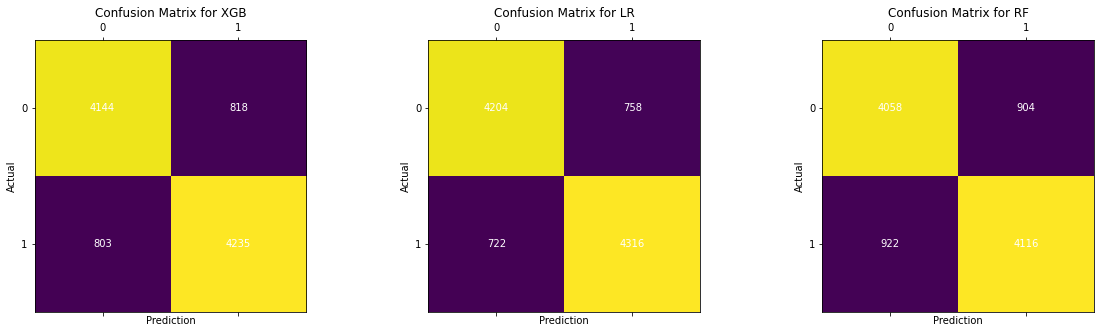

In [34]:
# Process the Doc2Vec data for modeling:
# Split the data into training and testing sets, perform label encoding, and create a DataFrame to store model results.

# Split the Doc2Vec vectors and sentiment labels into training and testing sets.
x_train, x_test, y_train, y_test = data_process(doc_vectors,imdb_data.sentiment)
doc2v_Data = model(x_train, x_test, y_train, y_test)

# Results 

In [35]:
#Result for Count Vectorizer
con2Vec_Data

model  Accuracy Score  Precision    Recall  F1-score
0   XGB          0.8562   0.883684  0.839367  0.860955
1    LR          0.8865   0.890631  0.884835  0.887724
2    RF          0.8573   0.858873  0.858021  0.858447

In [36]:
#Result for TF-IDF Vectorizer
tfidf2Vec_Data

model  Accuracy Score  Precision    Recall  F1-score
0   XGB          0.8559   0.880310  0.841077  0.860246
1    LR          0.8963   0.908495  0.888220  0.898244
2    RF          0.8546   0.855697  0.855697  0.855697

In [37]:
#Result for Word2Vec
w2v_Data

model  Accuracy Score  Precision    Recall  F1-score
0   XGB          0.8555   0.859667  0.854409  0.857030
1    LR          0.8633   0.869591  0.860538  0.865041
2    RF          0.8364   0.851528  0.828505  0.839859

In [38]:
#Result for Doc2Vec
doc2v_Data

model  Accuracy Score  Precision    Recall  F1-score
0   XGB          0.8379   0.840611  0.838116  0.839362
1    LR          0.8520   0.856689  0.850611  0.853639
2    RF          0.8174   0.816991  0.819920  0.818453

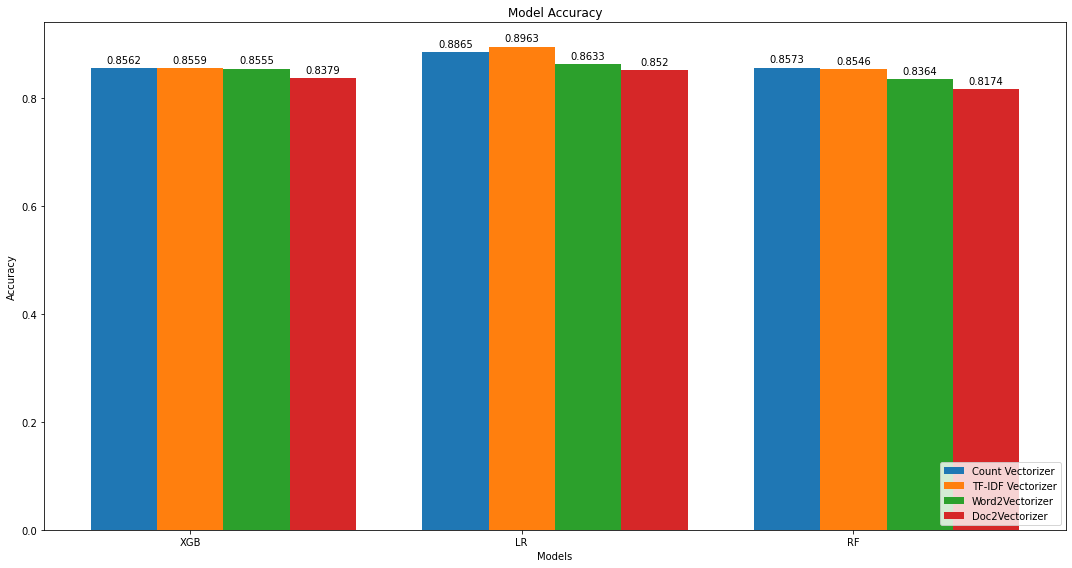

In [39]:
# Plotting the Model Accuracy Comparison Bar Chart:
# This code visualizes the accuracy scores of different models using various vectorization techniques.

# Define the width of each bar and the range of x values.
x = range(len(con2Vec_Data.index))
width = 0.20

# Create a new figure and axes for the bar chart.
fig, ax = plt.subplots(figsize=(15, 8))

# Create bar plots for each vectorization technique's accuracy scores.
rects1 = ax.bar(x, con2Vec_Data['Accuracy Score'], width, label='Count Vectorizer') 
rects2 = ax.bar([p + width for p in x],tfidf2Vec_Data['Accuracy Score'] , width, label='TF-IDF Vectorizer')
rects3 = ax.bar([p + width*2 for p in x],w2v_Data['Accuracy Score'] , width, label='Word2Vectorizer')
rects4 = ax.bar([p + width*3 for p in x],doc2v_Data['Accuracy Score'] , width, label='Doc2Vectorizer')

# Add labels and title to the plot.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(con2Vec_Data['model'])
ax.legend(loc='lower right')

# Add value labels on top of each bar.
plt.bar_label(rects1, padding=3)  
plt.bar_label(rects2, padding=3)
plt.bar_label(rects3, padding=3)
plt.bar_label(rects4, padding=3)

# Adjust the layout of the plot to prevent overlapping.
fig.tight_layout()

# Display the plot.
plt.show()